In [323]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
from datetime import datetime
import cufflinks as cf
import seaborn as sns
import numpy as np

In [92]:
final_data = pd.read_csv("../df.csv", low_memory=False)

In [93]:
filtered_dataframe = final_data.dropna(subset=['AQI_Bucket'])
filtered_dataframe = filtered_dataframe.drop(["EBE", "NMHC", "TCH", "TOL", "CH4", "lat", "lon", "PM25"], axis=1)

In [94]:
filtered_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1680841 entries, 0 to 1680840
Data columns (total 35 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   StationId               1680841 non-null  object 
 1   Date                    1680841 non-null  object 
 2   PM2.5                   1680841 non-null  float64
 3   PM10                    1680841 non-null  float64
 4   NO                      1680841 non-null  float64
 5   NO2                     1680841 non-null  float64
 6   NOx                     1680841 non-null  float64
 7   NH3                     1680841 non-null  float64
 8   CO                      1680841 non-null  float64
 9   SO2                     1680841 non-null  float64
 10  O3                      1680841 non-null  float64
 11  Benzene                 1680841 non-null  float64
 12  Toluene                 1680841 non-null  float64
 13  Xylene                  1680841 non-null  float64
 14  AQ

In [95]:
filtered_dataframe['V_P_C'] = filtered_dataframe['PM2.5']+filtered_dataframe['PM10']+filtered_dataframe['NO']+filtered_dataframe['NO2']+filtered_dataframe['NOx']+filtered_dataframe['NH3']+filtered_dataframe['CO']
filtered_dataframe['I_P_C'] = filtered_dataframe['SO2']+filtered_dataframe['O3']+filtered_dataframe['Benzene']+filtered_dataframe['Toluene']+filtered_dataframe['Xylene']

In [96]:
temp_data_cities = filtered_dataframe[(filtered_dataframe['City'] == 'Delhi') | (filtered_dataframe['City'] == 'Amaravati')]
cities_pollution = temp_data_cities.groupby(['Year', 'City']).agg({'I_P_C': ['mean']})
cities_pollution = cities_pollution.reset_index()
cities_pollution_industry = []
for index, row in cities_pollution.iterrows():
    cities_pollution_industry.append({'Year' : str(int(row[0])), 'I_P_C': row[2], 'City': row[1]})
cities_pollution_industry = pd.DataFrame(cities_pollution_industry)

In [97]:
most_polluted_citites = filtered_dataframe.groupby(['City']).agg({'I_P_C': ['mean']})
most_polluted_citites = most_polluted_citites.reset_index()
most_polluted_citites_by_industry = []
for index, row in most_polluted_citites.iterrows():
    most_polluted_citites_by_industry.append({'City' : row[0], 'I_P_C': row[1]})
most_polluted_citites_by_industry = pd.DataFrame(most_polluted_citites_by_industry)

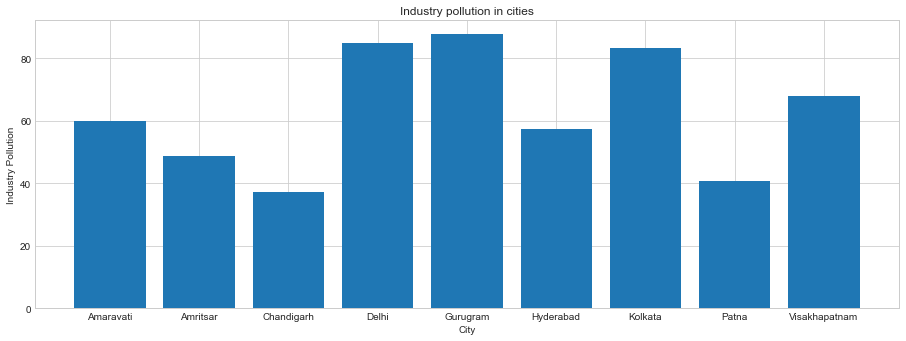

In [98]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(most_polluted_citites_by_industry['City'], most_polluted_citites_by_industry['I_P_C'])
ax.set_xlabel('City')
ax.set_ylabel('Industry Pollution')
ax.set_title('Industry pollution in cities')
plt.show()

In [99]:
most_polluted_citites = filtered_dataframe.groupby(['City']).agg({'V_P_C': ['mean']})
most_polluted_citites = most_polluted_citites.reset_index()
most_polluted_citites_by_vehicle = []
for index, row in most_polluted_citites.iterrows():
    most_polluted_citites_by_vehicle.append({'City' : row[0], 'V_P_C': row[1]})
most_polluted_citites_by_vehicle = pd.DataFrame(most_polluted_citites_by_vehicle)

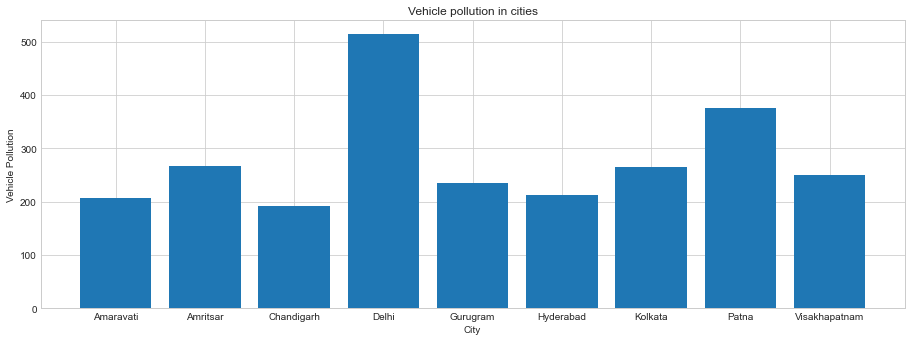

<Figure size 864x576 with 0 Axes>

In [100]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
plt.figure(figsize=(12,8))
ax.bar(most_polluted_citites_by_vehicle['City'], most_polluted_citites_by_vehicle['V_P_C'])
ax.set_xlabel('City')
ax.set_ylabel('Vehicle Pollution')
ax.set_title('Vehicle pollution in cities')
plt.show()

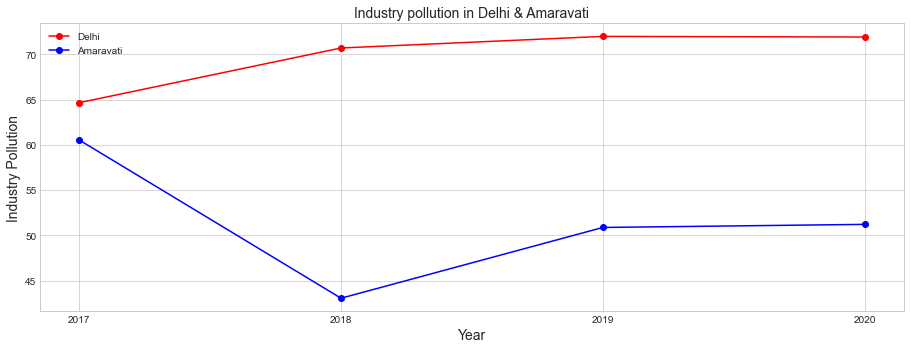

In [85]:
delhi_data = cities_pollution_industry[(cities_pollution_industry['City'] == 'Delhi') & (cities_pollution_industry['Year'] != '2015')]
amaravati_data = cities_pollution_industry[cities_pollution_industry['City'] == 'Amaravati']
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
plt.plot(delhi_data['Year'], delhi_data['I_P_C'], color='red', marker='o')
plt.plot(amaravati_data['Year'], amaravati_data['I_P_C'], color='blue', marker='o')
plt.title('Industry pollution in Delhi & Amaravati', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Industry Pollution', fontsize=14)
plt.legend(['Delhi', 'Amaravati'])
plt.grid(True)
plt.show()

In [101]:
most_polluted = filtered_dataframe[['City', 'AQI', 'PM10', 'CO']].groupby(['City']).mean().sort_values(by = 'AQI', ascending = False)

<Figure size 864x576 with 0 Axes>

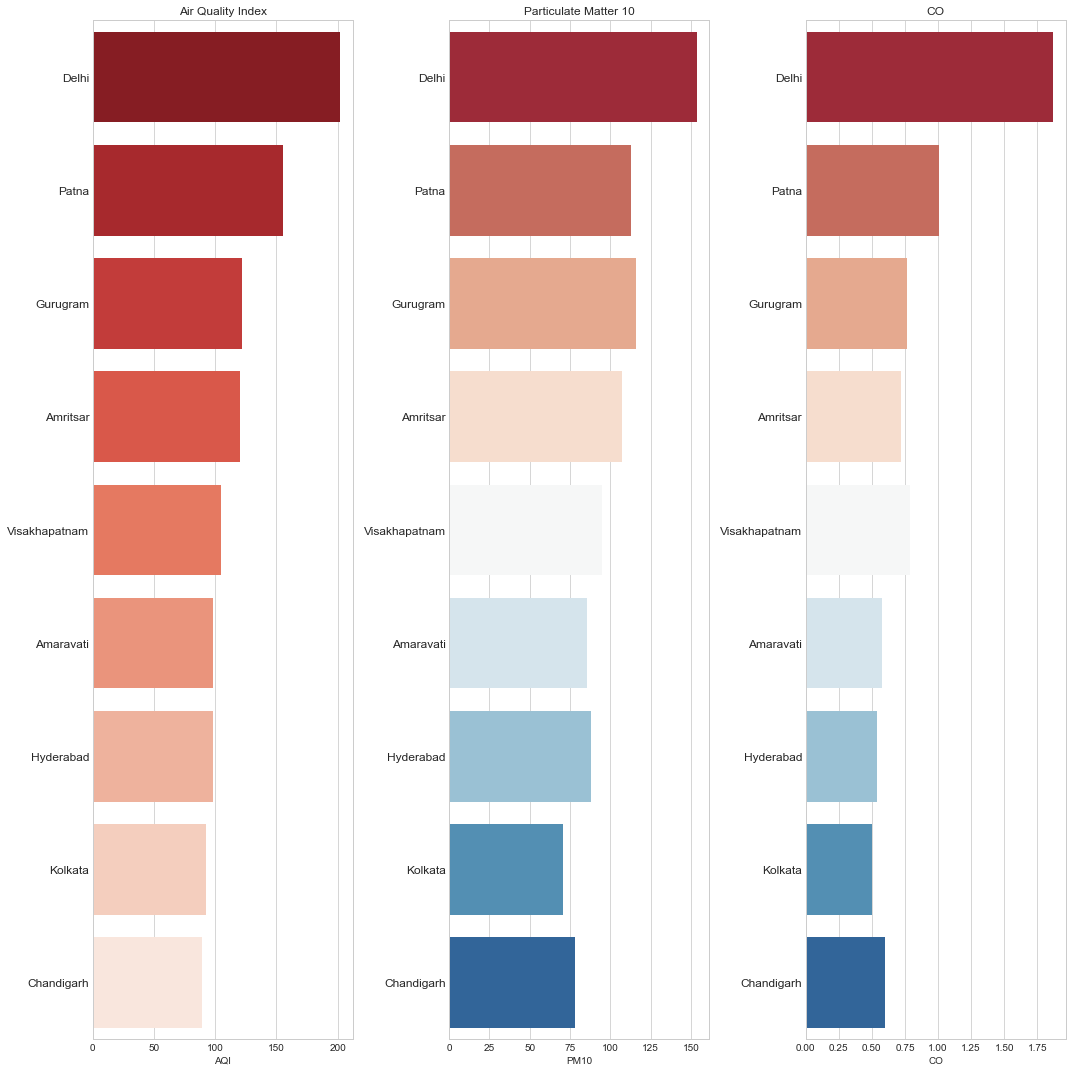

In [89]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,8))
f, ax_ = plt.subplots(1, 3, figsize = (15,15))

bar1 = sns.barplot(x = most_polluted.AQI,
                   y = most_polluted.index,
                   palette = 'Reds_r',
                   ax = ax_[0]);

bar1 = sns.barplot(x = most_polluted.PM10,
                   y = most_polluted.index,
                   palette = 'RdBu',
                   ax = ax_[1]);

bar1 = sns.barplot(x = most_polluted.CO,
                   y = most_polluted.index,
                   palette = 'RdBu',
                   ax = ax_[2]);

titles = ['Air Quality Index', 'Particulate Matter 10', 'CO']
for i in range(3) :
    ax_[i].set_ylabel('')   
    ax_[i].set_yticklabels(labels = ax_[i].get_yticklabels(),fontsize = 12);
    ax_[i].set_title(titles[i])
    f.tight_layout()

<AxesSubplot:xlabel='AQI', ylabel='NO2'>

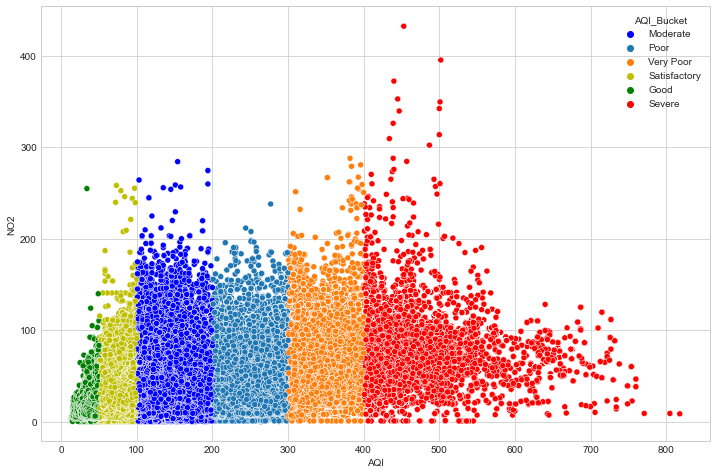

In [102]:
plt.figure(figsize=(12,8))
palette ={'Good': "g", 'Poor': "C0", 'Very Poor': "C1",'Severe': "r","Moderate": 'b',"Satisfactory":'y'}
sns.scatterplot(x= 'AQI', y= 'NO2', data=filtered_dataframe,hue ='AQI_Bucket',palette = palette, ci= None)

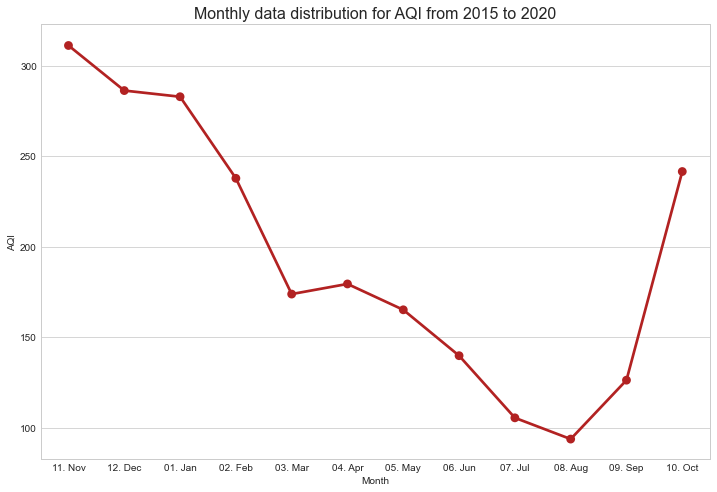

In [18]:
plt.figure(figsize=(12,8))
a = sns.pointplot(x= "Month", y= 'AQI', data=filtered_dataframe, color='firebrick')
a.set_title(f"Monthly data distribution for AQI from 2015 to 2020", fontsize=16)
display()

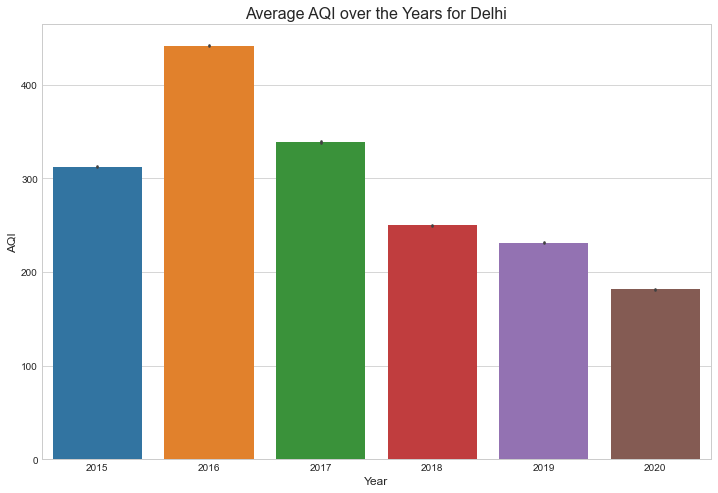

In [105]:
col = 'Delhi'
plt.figure(figsize=(12,8))
x= filtered_dataframe[filtered_dataframe['City']==col]
sns.barplot(x='Year', y='AQI', data=x, palette ='tab10')
plt.title(f"Average AQI over the Years for {col}", fontsize=16)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('AQI', fontsize = 12)
display()

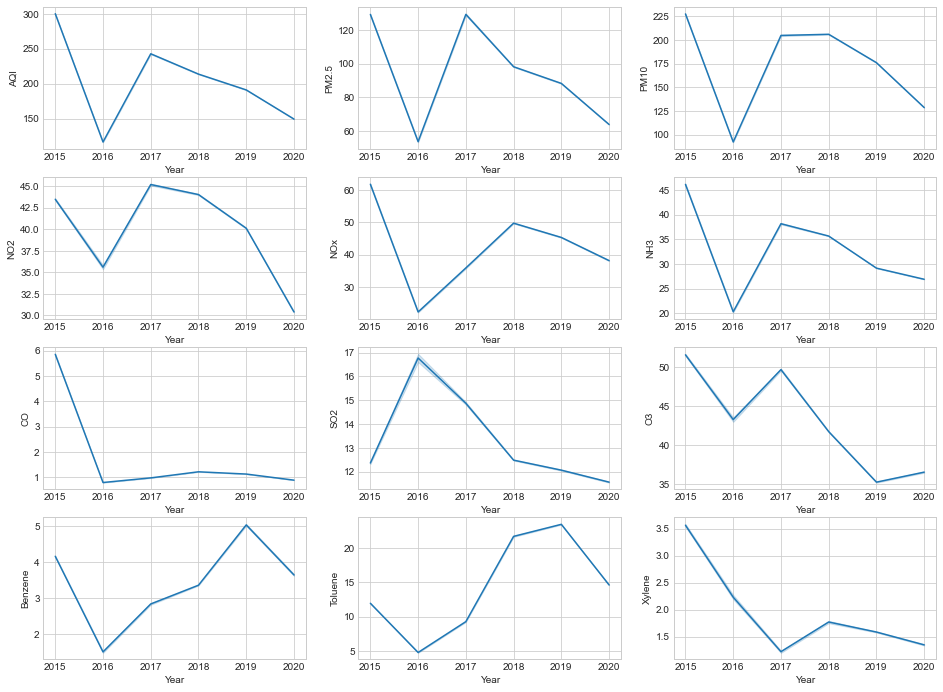

In [149]:
cols=['AQI','PM2.5','PM10','NO2','NOx','NH3',
      'CO','SO2','O3','Benzene','Toluene','Xylene']
x=filtered_dataframe.iloc[:,2:]
fig=plt.figure(figsize=(16,12))
for i,col  in enumerate(cols):
    fig.add_subplot(4,3,i+1)
    sns.lineplot(x='Year',y=col,data=x)

In [217]:
def get_data_by_period(year, day_period):
    data = filtered_dataframe[(filtered_dataframe['Year'] == year) & (filtered_dataframe['day_period'] == day_period)]
    return data.groupby('Month').mean()

In [222]:
morning_2016 = get_data_by_period(2016, 'Morning')
afternoon_2016 = get_data_by_period(2016, 'Afternoon')
evening_2016 = get_data_by_period(2016, 'Evening')
night_2016 = get_data_by_period(2016, 'Night')
morning_2017 = get_data_by_period(2017, 'Morning')
afternoon_2017 = get_data_by_period(2017, 'Afternoon')
evening_2017 = get_data_by_period(2017, 'Evening')
night_2017 = get_data_by_period(2017, 'Night')
morning_2018 = get_data_by_period(2018, 'Morning')
afternoon_2018 = get_data_by_period(2018, 'Afternoon')
evening_2018 = get_data_by_period(2018, 'Evening')
night_2018 = get_data_by_period(2018, 'Night')
morning_2019 = get_data_by_period(2019, 'Morning')
afternoon_2019 = get_data_by_period(2019, 'Afternoon')
evening_2019 = get_data_by_period(2019, 'Evening')
night_2019 = get_data_by_period(2019, 'Night')
morning_2020 = get_data_by_period(2020, 'Morning')
afternoon_2020 = get_data_by_period(2020, 'Afternoon')
evening_2020 = get_data_by_period(2020, 'Evening')
night_2020 = get_data_by_period(2020, 'Night')

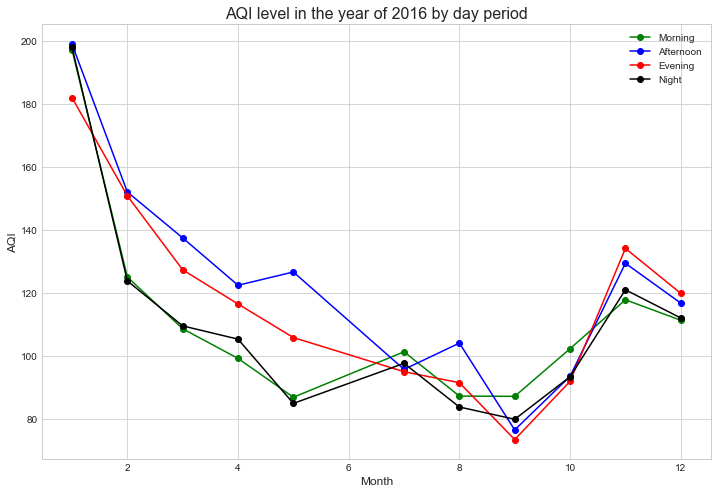

In [248]:
fig=plt.figure(figsize=(12,8))
plt.plot(morning_2016.index, morning_2016['AQI'], color='green', marker='o')
plt.plot(afternoon_2016.index, afternoon_2016['AQI'], color='blue', marker='o')
plt.plot(evening_2016.index, evening_2016['AQI'], color='red', marker='o')
plt.plot(night_2016.index, night_2016['AQI'], color='black', marker='o')

plt.title(f"AQI level in the year of 2016 by day period", fontsize=16)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('AQI', fontsize = 12)
plt.legend(labels = ['Morning', 'Afternoon', 'Evening', 'Night'])

plt.grid(True)
plt.show()

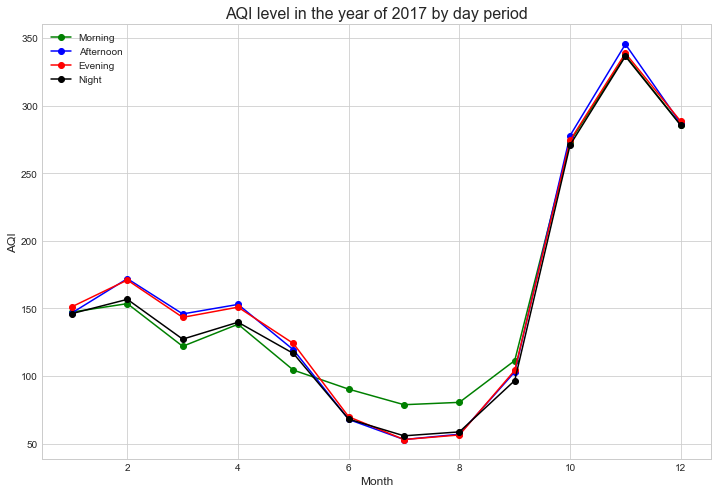

In [249]:
fig=plt.figure(figsize=(12,8))
plt.plot(morning_2017.index, morning_2017['AQI'], color='green', marker='o')
plt.plot(afternoon_2017.index, afternoon_2017['AQI'], color='blue', marker='o')
plt.plot(evening_2017.index, evening_2017['AQI'], color='red', marker='o')
plt.plot(night_2017.index, night_2017['AQI'], color='black', marker='o')

plt.title(f"AQI level in the year of 2017 by day period", fontsize=16)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('AQI', fontsize = 12)
plt.legend(labels = ['Morning', 'Afternoon', 'Evening', 'Night'])

plt.grid(True)
plt.show()

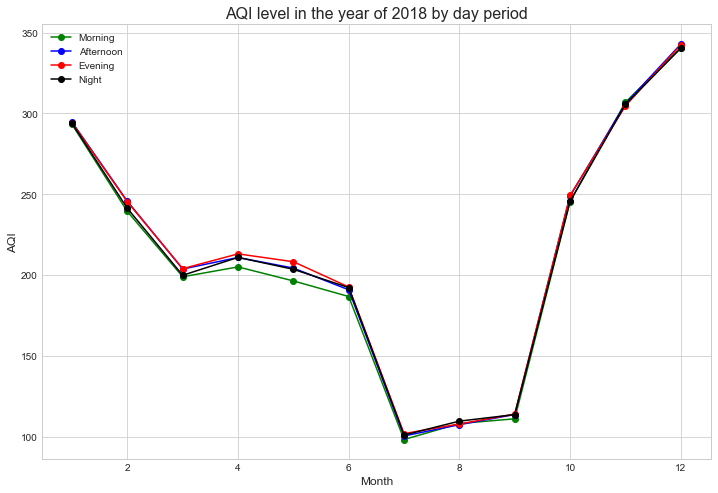

In [250]:
fig=plt.figure(figsize=(12,8))
plt.plot(morning_2018.index, morning_2018['AQI'], color='green', marker='o')
plt.plot(afternoon_2018.index, afternoon_2018['AQI'], color='blue', marker='o')
plt.plot(evening_2018.index, evening_2018['AQI'], color='red', marker='o')
plt.plot(night_2018.index, night_2018['AQI'], color='black', marker='o')

plt.title(f"AQI level in the year of 2018 by day period", fontsize=16)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('AQI', fontsize = 12)
plt.legend(labels = ['Morning', 'Afternoon', 'Evening', 'Night'])

plt.grid(True)
plt.show()

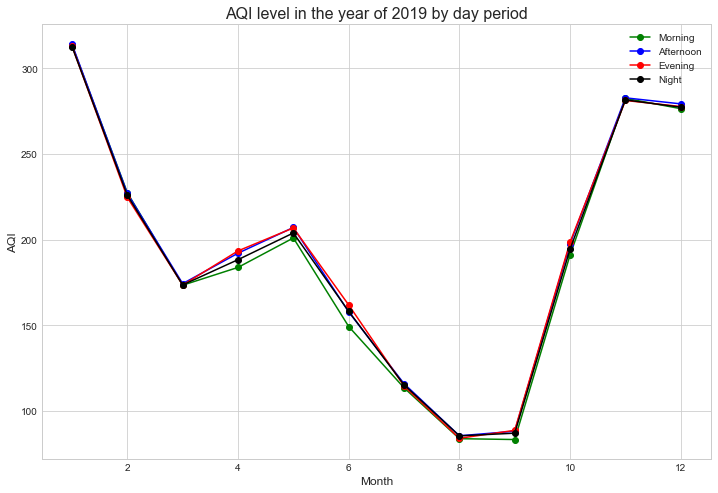

In [251]:
fig=plt.figure(figsize=(12,8))
plt.plot(morning_2019.index, morning_2019['AQI'], color='green', marker='o')
plt.plot(afternoon_2019.index, afternoon_2019['AQI'], color='blue', marker='o')
plt.plot(evening_2019.index, evening_2019['AQI'], color='red', marker='o')
plt.plot(night_2019.index, night_2019['AQI'], color='black', marker='o')

plt.title(f"AQI level in the year of 2019 by day period", fontsize=16)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('AQI', fontsize = 12)
plt.legend(labels = ['Morning', 'Afternoon', 'Evening', 'Night'])

plt.grid(True)
plt.show()

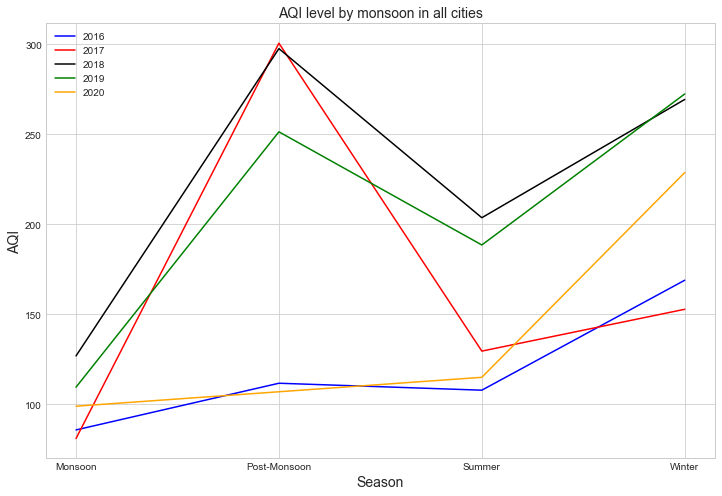

In [303]:
fig=plt.figure(figsize=(12,8))
season_data_2016 = filtered_dataframe[filtered_dataframe['Year'] == 2016].groupby('season').mean()
season_data_2017 = filtered_dataframe[filtered_dataframe['Year'] == 2017].groupby('season').mean()
season_data_2018 = filtered_dataframe[filtered_dataframe['Year'] == 2018].groupby('season').mean()
season_data_2019 = filtered_dataframe[filtered_dataframe['Year'] == 2019].groupby('season').mean()
season_data_2020 = filtered_dataframe[filtered_dataframe['Year'] == 2020].groupby('season').mean()
plt.plot(season_data_2016.index, season_data_2016['AQI'], color='blue')
plt.plot(season_data_2017.index, season_data_2017['AQI'], color='red')
plt.plot(season_data_2018.index, season_data_2018['AQI'], color='black')
plt.plot(season_data_2019.index, season_data_2019['AQI'], color='green')
plt.plot(season_data_2020.index, season_data_2020['AQI'], color='orange')
plt.xlabel('Season', fontsize = 14)
plt.ylabel('AQI', fontsize = 14)
plt.title('AQI level by monsoon in all cities', fontsize = 14)
plt.legend(['2016','2017','2018','2019','2020'])
plt.show()

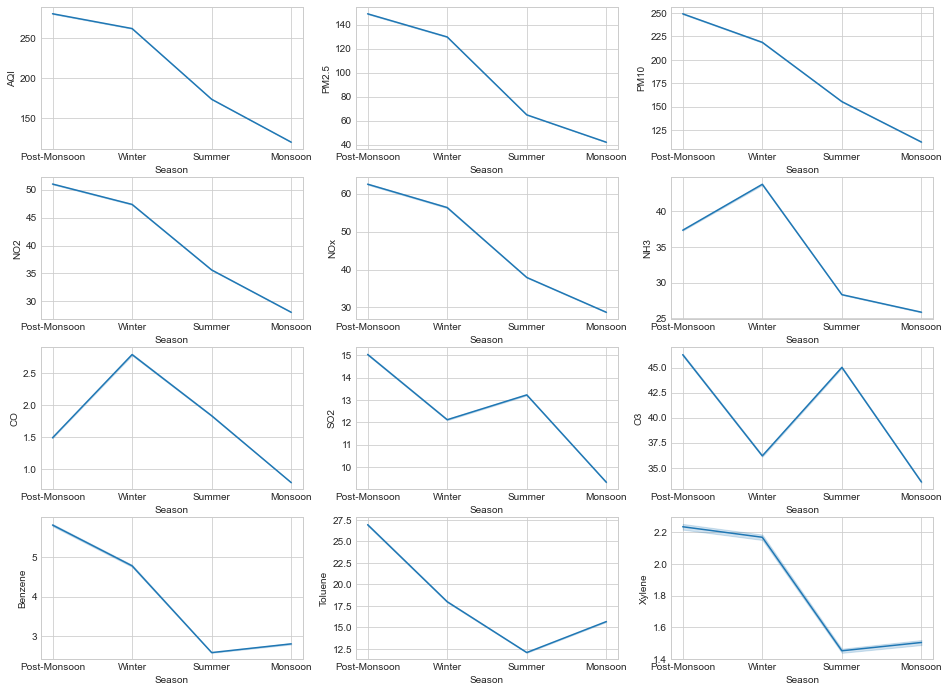

In [304]:
cols=['AQI','PM2.5','PM10','NO2','NOx','NH3',
      'CO','SO2','O3','Benzene','Toluene','Xylene']
x=filtered_dataframe.iloc[:,2:]
fig=plt.figure(figsize=(16,12))
for i,col  in enumerate(cols):
    fig.add_subplot(4,3,i+1)
    sns.lineplot(x='Season',y=col,data=x)

In [311]:
polluted_cities = pd.merge(most_polluted_citites_by_vehicle, most_polluted_citites_by_industry, on = 'City')

In [338]:
polluted_cities = polluted_cities.sort_values(['V_P_C', 'I_P_C'], ascending=False)

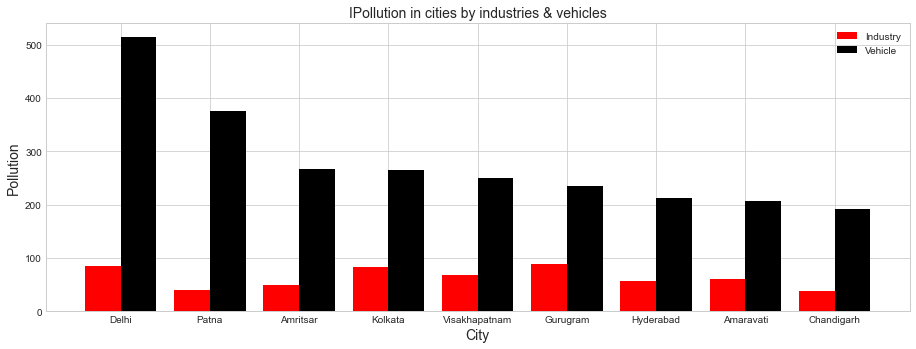

In [348]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
X_axis = np.arange(len(polluted_cities))
plt.bar(X_axis - 0.2, polluted_cities['I_P_C'], 0.4, color = 'red')
plt.bar(X_axis + 0.2, polluted_cities['V_P_C'], 0.4, color = 'black')
plt.xticks(X_axis, polluted_cities['City'])
plt.xlabel('City', fontsize = 14)
plt.ylabel('Pollution', fontsize = 14)
plt.title('IPollution in cities by industries & vehicles', fontsize = 14)
plt.legend(['Industry', 'Vehicle'])
plt.show()

In [371]:
polluted_citites_weekday_end = filtered_dataframe.groupby(['City','Weekday_or_weekend']).agg({'V_P_C': ['mean']})
polluted_citites_weekday_end = polluted_citites_weekday_end.reset_index()
polluted_citites_weekday_end = pd.DataFrame(polluted_citites_weekday_end)
polluted_citites_weekday_end.dtypes
polluted_citites_weekday_end_df = []
for index, row in polluted_citites_weekday_end.iterrows():
    polluted_citites_weekday_end_df.append({'City' : row[0], 'V_P_C': row[2], 'weekday_weekend': row[1]})
polluted_citites_weekday_end_df = pd.DataFrame(polluted_citites_weekday_end_df)
polluted_citites_weekday_end_df = polluted_citites_weekday_end_df.pivot(index='City', columns='weekday_weekend', values='V_P_C')
polluted_citites_weekday_end_df = polluted_citites_weekday_end_df.sort_index(axis=1, level=1)
polluted_citites_weekday_end_df = polluted_citites_weekday_end_df.reset_index()
polluted_citites_weekday_end_df

weekday_weekend,City,Weekday,Weekend
0,Amaravati,207.097777,209.165065
1,Amritsar,268.889593,261.951751
2,Chandigarh,195.641908,184.052624
3,Delhi,518.663705,503.145430
4,Gurugram,238.060884,228.327615
5,Hyderabad,213.259321,211.425496
6,Kolkata,267.824877,256.136400
7,Patna,382.297833,357.932522
8,Visakhapatnam,251.338165,246.243325


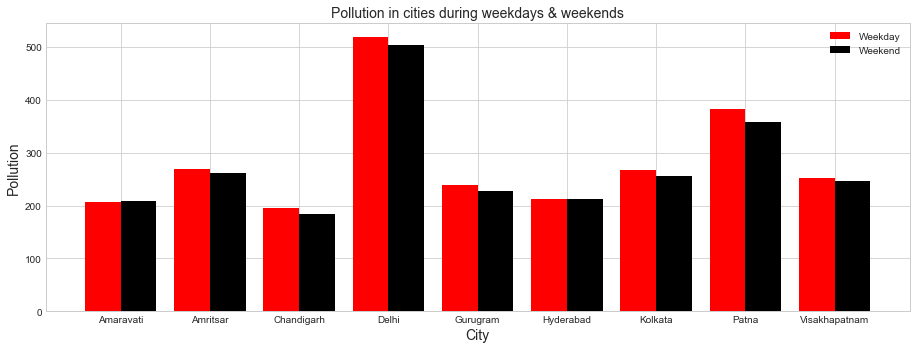

In [372]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
X_axis = np.arange(len(polluted_citites_weekday_end_df))
plt.bar(X_axis - 0.2, polluted_citites_weekday_end_df['Weekday'], 0.4, color = 'red')
plt.bar(X_axis + 0.2, polluted_citites_weekday_end_df['Weekend'], 0.4, color = 'black')
plt.xticks(X_axis, polluted_citites_weekday_end_df['City'])
plt.xlabel('City', fontsize = 14)
plt.ylabel('Pollution', fontsize = 14)
plt.title('Pollution in cities during weekdays & weekends', fontsize = 14)
plt.legend(['Weekday', 'Weekend'])
plt.show()